<a href="https://colab.research.google.com/github/hijaz/RecommenderSystems/blob/main/1_RecSys_PopRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary library
!pip install pandas numpy matplotlib

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Sample dataset
data = {
    'movie_id': [1, 2, 3, 4, 5],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'rating': [4.5, 4.0, 3.0, 4.5, 5.0],
    'vote_count': [2, 100, 20, 5, 1]
}

In [5]:
df = pd.DataFrame(data)

# Display the dataset
print("Initial Dataset:")
print(df)

Initial Dataset:
   movie_id    title  rating  vote_count
0         1  Movie A     4.5           2
1         2  Movie B     4.0         100
2         3  Movie C     3.0          20
3         4  Movie D     4.5           5
4         5  Movie E     5.0           1


In [6]:
# Step 1: Initial Ranking Based on Average Rating
simple_ranking = df.sort_values('rating', ascending=False)
print("\nStep 1: Simple Ranking Based on Average Rating:")
print(simple_ranking)


Step 1: Simple Ranking Based on Average Rating:
   movie_id    title  rating  vote_count
4         5  Movie E     5.0           1
0         1  Movie A     4.5           2
3         4  Movie D     4.5           5
1         2  Movie B     4.0         100
2         3  Movie C     3.0          20


In [7]:
# Step 2: Multiply Average Rating by Number of Votes
df['simple_weighted_rating'] = df['rating'] * df['vote_count']
simple_weighted_ranking = df.sort_values('simple_weighted_rating', ascending=False)
print("\nStep 2: Simple Weighted Rating by Multiplying Rating by Number of Votes:")
print(simple_weighted_ranking)


Step 2: Simple Weighted Rating by Multiplying Rating by Number of Votes:
   movie_id    title  rating  vote_count  simple_weighted_rating
1         2  Movie B     4.0         100                   400.0
2         3  Movie C     3.0          20                    60.0
3         4  Movie D     4.5           5                    22.5
0         1  Movie A     4.5           2                     9.0
4         5  Movie E     5.0           1                     5.0


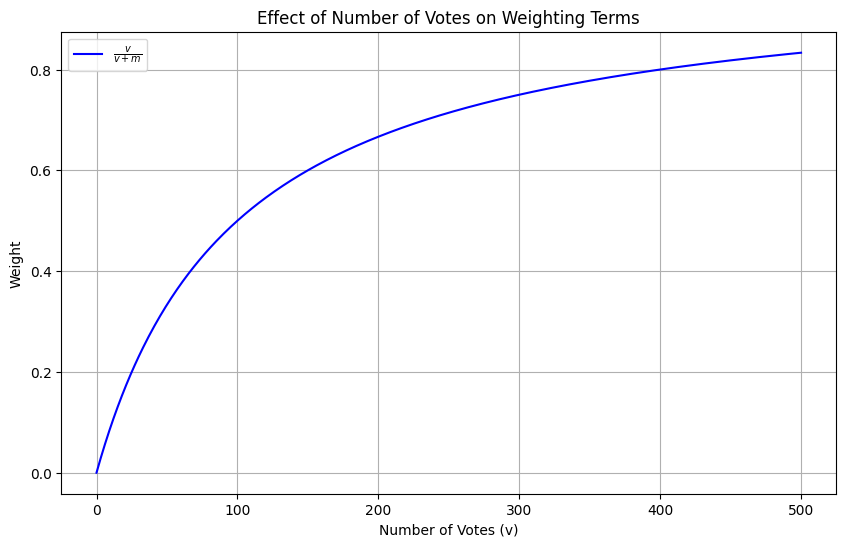

In [8]:
m = 100

v = np.linspace(0, 500, 500)
v_over_v_plus_m = v / (v + m)


plt.figure(figsize=(10, 6))
plt.plot(v, v_over_v_plus_m, label=r'$\frac{v}{v+m}$', color='blue')
plt.xlabel('Number of Votes (v)')
plt.ylabel('Weight')
plt.title('Effect of Number of Votes on Weighting Terms')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Step 3: Normalize by Adding a Constant (75th Percentile of Vote Counts)
m = df['vote_count'].quantile(0.75)
df['normalized_rating_with_m'] = df['rating'] * (df['vote_count']/ (df['vote_count'] + m))
normalized_ranking_with_m = df.sort_values('normalized_rating_with_m', ascending=False)
print("\nStep 3: Normalized Rating with m:")
print(normalized_ranking_with_m)


Step 3: Normalized Rating with m:
   movie_id    title  rating  vote_count  simple_weighted_rating  \
1         2  Movie B     4.0         100                   400.0   
2         3  Movie C     3.0          20                    60.0   
3         4  Movie D     4.5           5                    22.5   
0         1  Movie A     4.5           2                     9.0   
4         5  Movie E     5.0           1                     5.0   

   normalized_rating_with_m  
1                  3.333333  
2                  1.500000  
3                  0.900000  
0                  0.409091  
4                  0.238095  


In [10]:
# Step 4: Calculate the Mean Average Rating
C = df['rating'].mean()
print("\nStep 4: Mean Average Rating (C):", C)


Step 4: Mean Average Rating (C): 4.2


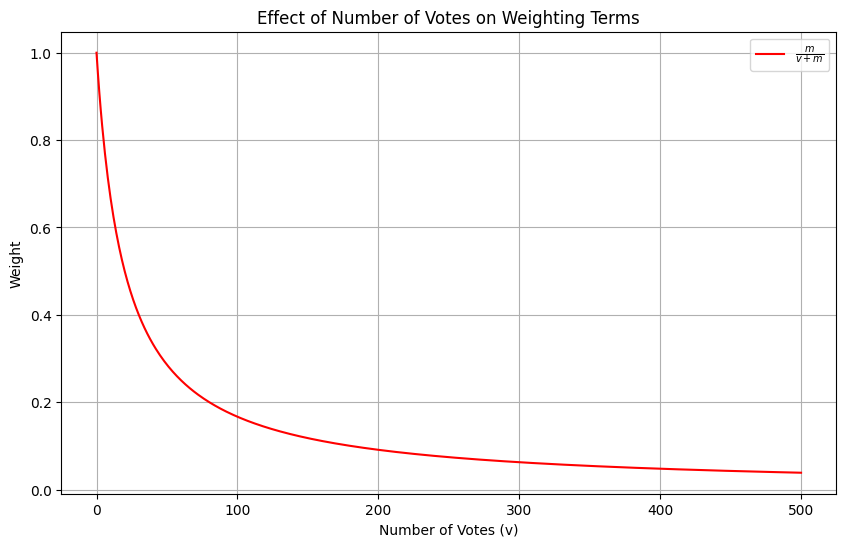

In [11]:
m = df['vote_count'].quantile(0.75)

v = np.linspace(0, 500, 500)
m_over_v_plus_m = m / (v + m)

plt.figure(figsize=(10, 6))
plt.plot(v, m_over_v_plus_m, label=r'$\frac{m}{v+m}$', color='red')
plt.xlabel('Number of Votes (v)')
plt.ylabel('Weight')
plt.title('Effect of Number of Votes on Weighting Terms')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Step 5: Combine Adjusted Rating with the Global Average
df['weighted_rating'] = (df['vote_count'] / (df['vote_count'] + m) * df['rating']) + (m / (df['vote_count'] + m) * C)
weighted_ranking = df.sort_values('weighted_rating', ascending=False)
print("\nStep 5: Final Weighted Rating:")
print(weighted_ranking)


Step 5: Final Weighted Rating:
   movie_id    title  rating  vote_count  simple_weighted_rating  \
3         4  Movie D     4.5           5                    22.5   
4         5  Movie E     5.0           1                     5.0   
0         1  Movie A     4.5           2                     9.0   
1         2  Movie B     4.0         100                   400.0   
2         3  Movie C     3.0          20                    60.0   

   normalized_rating_with_m  weighted_rating  
3                  0.900000         4.260000  
4                  0.238095         4.238095  
0                  0.409091         4.227273  
1                  3.333333         4.033333  
2                  1.500000         3.600000  
